# PKPD 103: Effect Compartment Propofol Simulation

This notebook reproduces the propofol effect-compartment example from the post.


In [1]:
import numpy as np
from scipy.integrate import solve_ivp

CL, V = 90.0, 30.0            # L/min, L
ke0 = 0.26                    # min^-1
E0, Emax = 100.0, 90.0        # baseline %, maximal drop %
EC50, gamma = 1.8, 2.2        # mg/L, Hill coefficient
dose = 150.0                  # mg IV bolus

def rhs(t, y):
    Cp, Ce = y
    dCp = -(CL / V) * Cp
    dCe = ke0 * (Cp - Ce)
    return [dCp, dCe]

C0 = dose / V
sol = solve_ivp(rhs, [0, 20], [C0, 0.0], dense_output=True)
time = np.linspace(0, 20, 200)
Cp, Ce = sol.sol(time)
effect = E0 - Emax * (Ce**gamma) / (EC50**gamma + Ce**gamma)

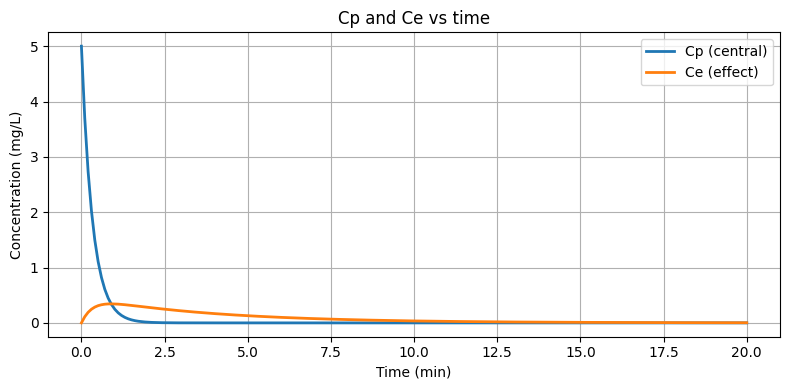

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(time, Cp, label='Cp (central)', lw=2)
plt.plot(time, Ce, label='Ce (effect)', lw=2)
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mg/L)')
plt.title('Cp and Ce vs time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()